In [14]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

## 1. Data Preprocessing

In [15]:
df = pd.read_csv('data/iris-data.csv')

In [16]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    150 non-null float64
sepal_width_cm     150 non-null float64
petal_length_cm    150 non-null float64
petal_width_cm     145 non-null float64
class              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [19]:
df = df.dropna(subset=['petal_width_cm'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 149
Data columns (total 5 columns):
sepal_length_cm    145 non-null float64
sepal_width_cm     145 non-null float64
petal_length_cm    145 non-null float64
petal_width_cm     145 non-null float64
class              145 non-null object
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


## 2.异常值的处理

/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


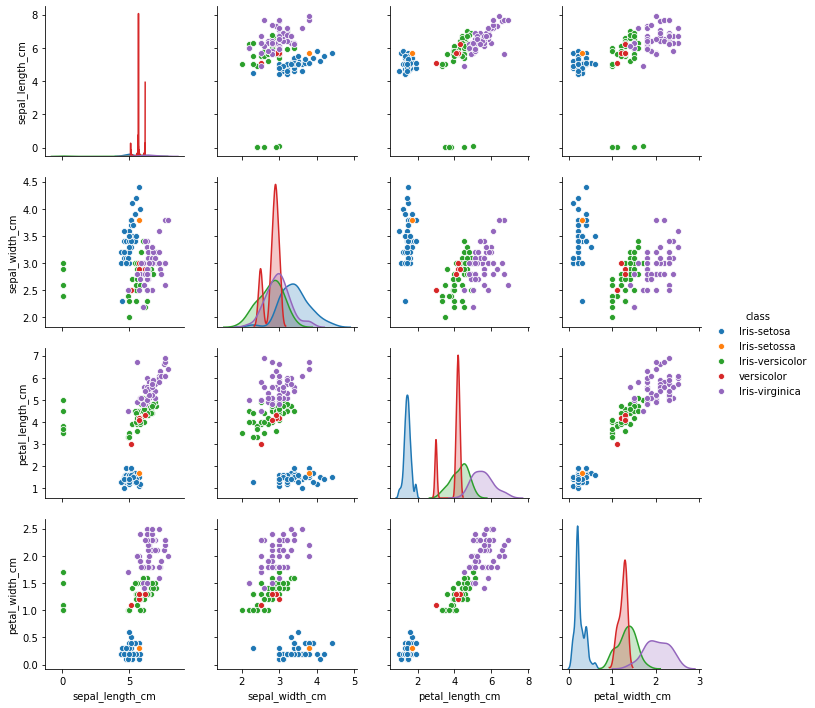

In [21]:
sns.pairplot(df, hue='class', size=2.5)

### 2.1 类别字段异常

In [22]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    45
Iris-setosa        44
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [23]:
df['class'].replace(['Iris-setossa', 'versicolor'], ['Iris-setosa', 'Iris-versicolor'], inplace=True)

In [24]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        45
Name: class, dtype: int64

In [28]:
# 分类 Iris-versicolo 和 ris-setosa
final_df = df[df['class'] != 'Iris-virginica']

In [29]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


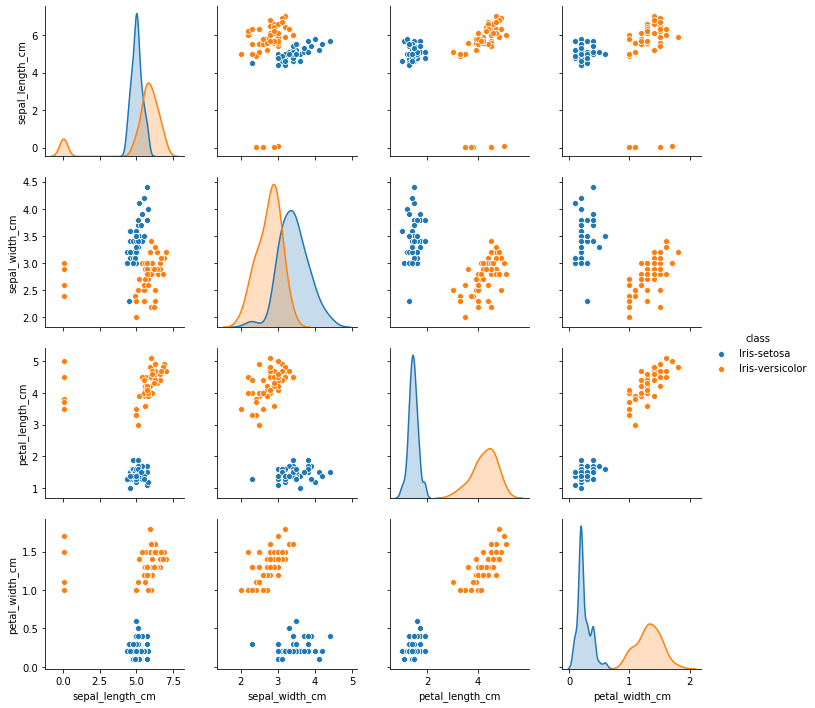

In [31]:
sns.pairplot(final_df, hue='class', size=2.5)

### 2.2 sepal_length_cm字段异常值

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a29f7cc88>]],
      dtype=object)

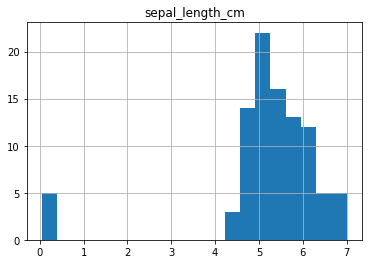

In [34]:
final_df.hist(column='sepal_length_cm', bins=20)

In [37]:
# 有5个点的值小于1，通过单位转换由m变成cm
final_df.loc[final_df.sepal_length_cm < 1, ['sepal_length_cm']] = final_df['sepal_length_cm'] * 100

/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a297424a8>]],
      dtype=object)

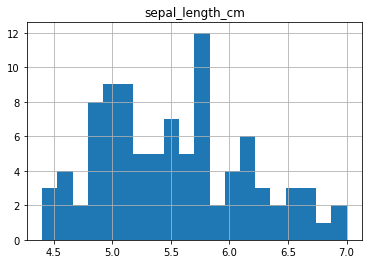

In [36]:
final_df.hist(column='sepal_length_cm', bins=20)

### 2.3 sepal_width_cm字段异常值

In [42]:
final_df = final_df.drop(final_df[(final_df['class'] == 'Iris-setosa') & (final_df['sepal_width_cm'] < 2.5)].index)

/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


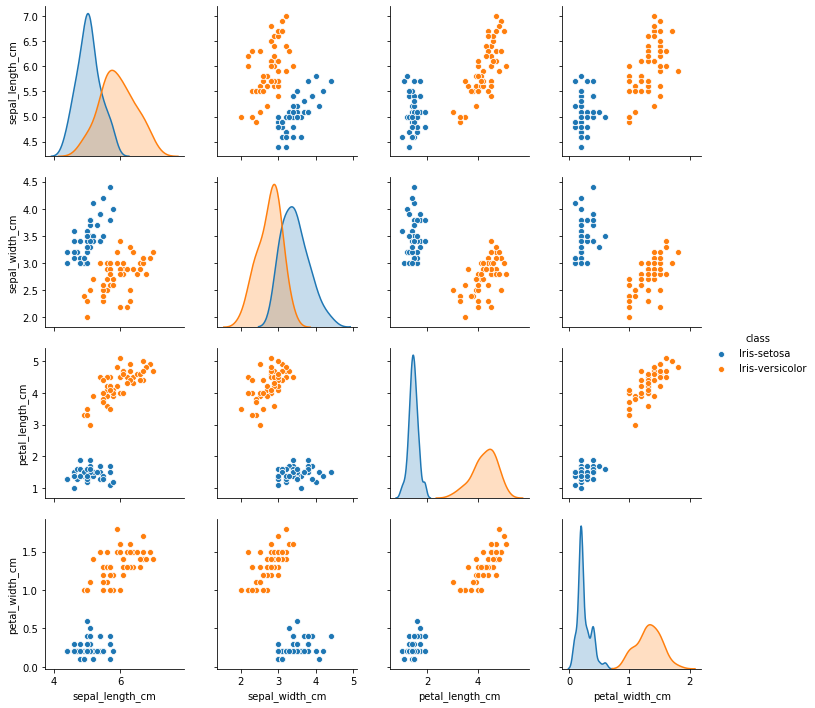

In [45]:
sns.pairplot(final_df, hue='class', size=2.5)

## 3. Label Encoding

In [49]:
final_df['class'].replace(['Iris-setosa', 'Iris-versicolor'], [1, 0], inplace=True)

In [55]:
final_df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## 4. Logistic Regression

In [88]:
inp_df = final_df.drop(final_df.columns[[4]], axis=1)
out_df = final_df.drop(final_df.columns[[0,1,2,3]], axis=1)

In [89]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [90]:
scaler = StandardScaler()
inp_df = scaler.fit_transform(inp_df)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [92]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.as_matrix()
y_ts_arr = y_test.as_matrix()

/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [122]:
X_tr_arr.shape,y_tr_arr.shape, X_test.shape,  y_test.shape

((75, 4), (75, 1), (19, 4), (19, 1))

### 4.1 自定义Logistic Regression

In [123]:
# 初始化参数
def weightInitialization(n_features):
    w = np.zeros((1, n_features))
    b = 0
    return w,b

In [124]:
def sigmoid(result):
    return 1/(1 + np.exp(-result))

In [126]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    y_hat = sigmoid(np.dot(w, X.T) + b)
    # 损失函数 交叉熵损失
    cost = (-1/m) * np.sum((Y.T * np.log(y_hat) + (1 - Y.T) * np.log(1 - y_hat)))
    
    dw = (1/m) * (np.dot(X.T, (y_hat-Y.T).T))
    db = (1/m) * (np.sum(y_hat - Y.T))
    
    grads = {"dw":dw, "db":db}
    return grads, cost

In [127]:
def model_predict(w, b, X, Y, learning_rate, iterations):
    costs = []
    for i in range(iterations):
        grads, cost = model_optimize(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']
        
        w -= learning_rate * dw.T
        b -= learning_rate * db
        
        if i % 100 ==0:
            costs.append(cost)
    
    coeff = {'w':w, 'b':b}
    gradient = {'dw':dw, 'db':'db'}
    
    return coeff, gradient, costs

In [128]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [137]:
n_features = X_tr_arr.shape[1]
w, b = weightInitialization(n_features)

coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,iterations=4500)

coeff

({'w': array([[-0.13397714,  0.13130132, -0.18248682, -0.18319564]]),
  'b': -0.024134631921343585},)

In [138]:
final_train_pred = sigmoid(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid(np.dot(w,X_ts_arr.T)+b)
y_tr_pred = predict(final_train_pred, X_tr_arr.shape[0])
y_ts_pred = predict(final_test_pred,  X_ts_arr.shape[0])
print('Training Accuracy:',accuracy_score(y_tr_pred.T, y_tr_arr))
print('Test Accuracy:',accuracy_score(y_ts_pred.T, y_ts_arr))

Training Accuracy: 1.0
Test Accuracy: 1.0


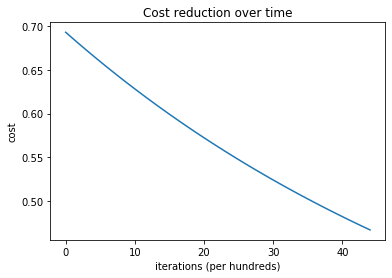

In [139]:
import matplotlib.pyplot as plt
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

### 4.2 使用Sklearn Logistics Regression

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
clf = LogisticRegression()

In [102]:
clf.fit(X_tr_arr, y_tr_arr)

/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/liling/anaconda3/envs/UdaCourse/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
clf.intercept_ , clf.coef_

(array([-0.32958987]),
 array([[-0.65118738,  1.21001434, -1.38924001, -1.46364162]]))

In [104]:
pred = clf.predict(X_ts_arr)

In [105]:
clf.score(X_ts_arr, y_ts_arr)

1.0